In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [12]:
dummies_payment_method = pd.get_dummies(data['PaymentMethod'],prefix='PaymentMethod')
dummies_payment_method.head()

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [17]:
data = pd.concat([data, dummies_payment_method], axis=1)
data[['PaymentMethod','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']].head()

,PaymentMethod,PaymentMethod_Bank transfer (automatic),PaymentMethod_Bank transfer (automatic),PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Electronic check,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Mailed check,PaymentMethod_Mailed check
0,Electronic check,0,0,0,0,0,0,1,1,1,0,0,0
1,Mailed check,0,0,0,0,0,0,0,0,0,1,1,1
2,Mailed check,0,0,0,0,0,0,0,0,0,1,1,1
3,Bank transfer (automatic),1,1,1,0,0,0,0,0,0,0,0,0
4,Electronic check,0,0,0,0,0,0,1,1,1,0,0,0


In [18]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [23]:
freq_et = data['InternetService'].value_counts().reset_index()
freq_et.rename(columns={"index": "InternetService", "InternetService": "freq_InternetService"}, inplace = True)
freq_et

,InternetService,freq_InternetService
0,Fiber optic,3096
1,DSL,2421
2,No,1526


In [29]:
sum_et = data.groupby(['InternetService']).agg({'SeniorCitizen':sum}).reset_index()
sum_et.rename(columns={'SeniorCitizen':'sum_InternetService'}, inplace = True)
sum_et

,InternetService,sum_InternetService
0,DSL,259
1,Fiber optic,831
2,No,52


In [40]:
data['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [41]:
freq_et = data['OnlineSecurity'].value_counts().reset_index()
freq_et.rename(columns={"index": "OnlineSecurity", "OnlineSecurity": "freq_OnlineSecurity"}, inplace = True)
freq_et['pct_OnlineSecurity'] = round((freq_et['freq_OnlineSecurity']/freq_et['OnlineSecurity'].sum())*100,2)
freq_et

,OnlineSecurity,freq_OnlineSecurity
0,No,3498
1,Yes,2019
2,No internet service,1526


In [42]:
data['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [43]:
freq_et = data['OnlineSecurity'].value_counts().reset_index()
freq_et.rename(columns={"index": "OnlineSecurity", "OnlineSecurity": "freq_OnlineSecurity"}, inplace = True)
freq_et

,OnlineSecurity,freq_OnlineSecurity
0,No,3498
1,Yes,2019
2,No internet service,1526


In [44]:
sum_et = data.groupby(['OnlineSecurity']).agg({'SeniorCitizen':sum}).reset_index()
sum_et.rename(columns={'SeniorCitizen':'sum_OnlineSecurity'}, inplace = True)
sum_et

,OnlineSecurity,sum_OnlineSecurity
0,No,808
1,No internet service,52
2,Yes,282


In [36]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [38]:
map_Contract = {'Month-to-month':3,
             'Two year':2,
             'One year':1}
data['Contract_cat'] = data['Contract'].map(map_Contract)
data[['Contract','Contract_cat']].head()

,Contract,Contract_cat
0,Month-to-month,3
1,One year,1
2,Month-to-month,3
3,One year,1
4,Month-to-month,3


In [39]:
data[['Contract','Contract_cat']].drop_duplicates()

,Contract,Contract_cat
0,Month-to-month,3
1,One year,1
11,Two year,2


In [45]:
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

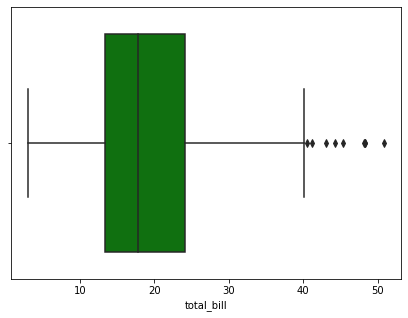

In [46]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(data['total_bill'],color='green',orient='h')

plt.tight_layout

In [47]:
data[['total_bill']].describe()

,total_bill
count,244.000000
mean,19.785943
std,8.902412
min,3.070000
25%,13.347500
50%,17.795000
75%,24.127500
max,50.810000


In [48]:
from scipy import stats

In [49]:
print('Jumlah baris sebelum handling outlier pada kolom Fare:', len(data))
data['total_bill zscore'] = abs(stats.zscore(data['total_bill']))
data.head()

Jumlah baris sebelum handling outlier pada kolom Fare: 244


,total_bill,tip,sex,smoker,day,time,size,total_bill zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [50]:
data = data[data['total_bill zscore'] < 3]
print(f'Jumlah baris setelah memfilter outlier:', len(data))
data.head()

Jumlah baris setelah memfilter outlier: 240


,total_bill,tip,sex,smoker,day,time,size,total_bill zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [51]:
((244-240)/244)*100

1.639344262295082

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

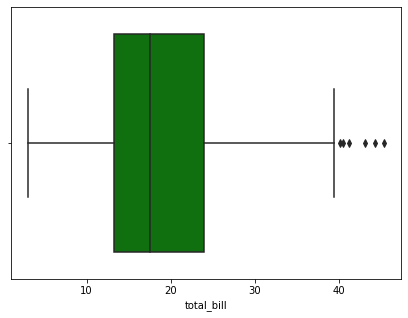

In [52]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(data['total_bill'],color='green',orient='h')

plt.tight_layout

In [55]:
Q1 = data['total_bill'].quantile(0.25)
Q3 = data['total_bill'].quantile(0.75)
IQR = Q3 - Q1
IQR

10.6875

In [56]:
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)

low_limit, high_limit

(-2.75375, 39.99625)

In [57]:
filtered_entries = ((data['total_bill'] >= low_limit) & (data['total_bill'] <= high_limit))
data = data[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier:', len(data))
data.head()

Jumlah baris setelah memfilter outlier: 234


,total_bill,tip,sex,smoker,day,time,size,total_bill zscore,log total_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.314711,2.889816
1,10.34,1.66,Male,No,Sun,Dinner,3,1.063235,2.428336
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780,3.091497
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315,3.205993
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745,3.242202


In [58]:
((244-234)/244)*100

4.098360655737705

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

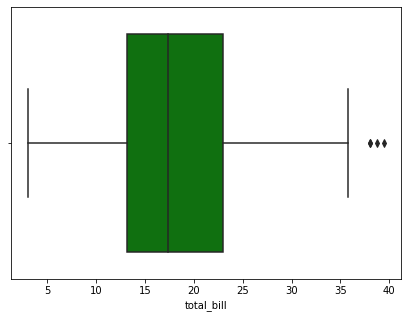

In [59]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(data['total_bill'],color='green',orient='h')

plt.tight_layout    

In [60]:
data['log total_bill'] = np.log(data['total_bill']+1)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

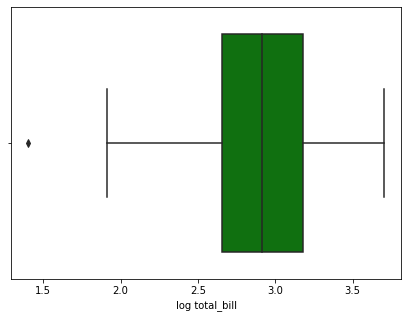

In [61]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(data['log total_bill'],color='green',orient='h')

plt.tight_layout